In [1]:
# import quantum_simulation_recipe as qsr
# from quantum_simulation_recipe import spin_ham
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city
from qiskit.quantum_info import SparsePauliOp, commutator, anti_commutator, entropy, Statevector, random_statevector, random_density_matrix, partial_trace
import numpy as np
from numpy.linalg import norm  

In [2]:
## create a statevector from label such as '11'
product_vec = Statevector.from_label('1'*2) # 0, 1, r, l
print('product_vec: ', product_vec)

product_vec:  Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


In [3]:
## to_dict
psi = Statevector.from_label('-0')
print(psi.to_dict())

{'00': (0.7071067811865475+0j), '10': (-0.7071067811865475+0j)}


In [4]:
## state to projector operator
print(psi.to_operator())
print(np.outer(psi.data, psi.data.conj()))

Operator([[ 0.5+0.j,  0. +0.j, -0.5-0.j,  0. +0.j],
          [ 0. +0.j,  0. +0.j,  0. -0.j,  0. +0.j],
          [-0.5+0.j,  0. +0.j,  0.5+0.j,  0. +0.j],
          [ 0. +0.j,  0. +0.j,  0. -0.j,  0. +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
[[ 0.5+0.j  0. +0.j -0.5-0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. -0.j  0. +0.j]
 [-0.5+0.j  0. +0.j  0.5+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. -0.j  0. +0.j]]


In [5]:
n = 2
psi0 = random_statevector([2, 2])
psi1 = Statevector.from_label('0'*n)
print('psi0: ', psi0)
psi0.inner(psi1)

psi0:  Statevector([ 0.23375753+0.4691517j ,  0.03260307-0.51794431j,
             -0.11203482-0.54968101j,  0.37579582+0.00114618j],
            dims=(2, 2))


(0.23375753236495705-0.4691516973390573j)

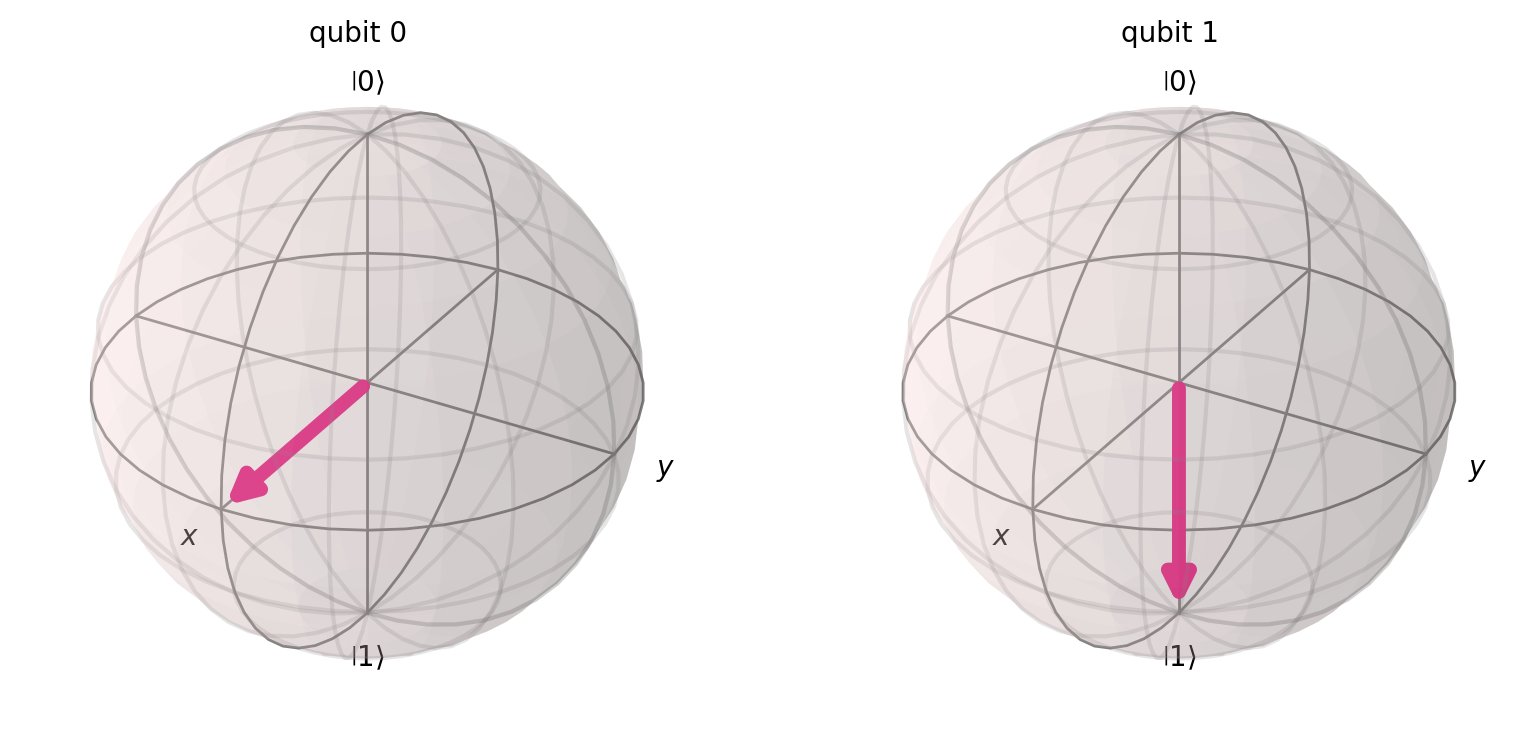

In [6]:
# https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_bloch_multivector
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector 

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
 
state = Statevector(qc)
plot_bloch_multivector(state)

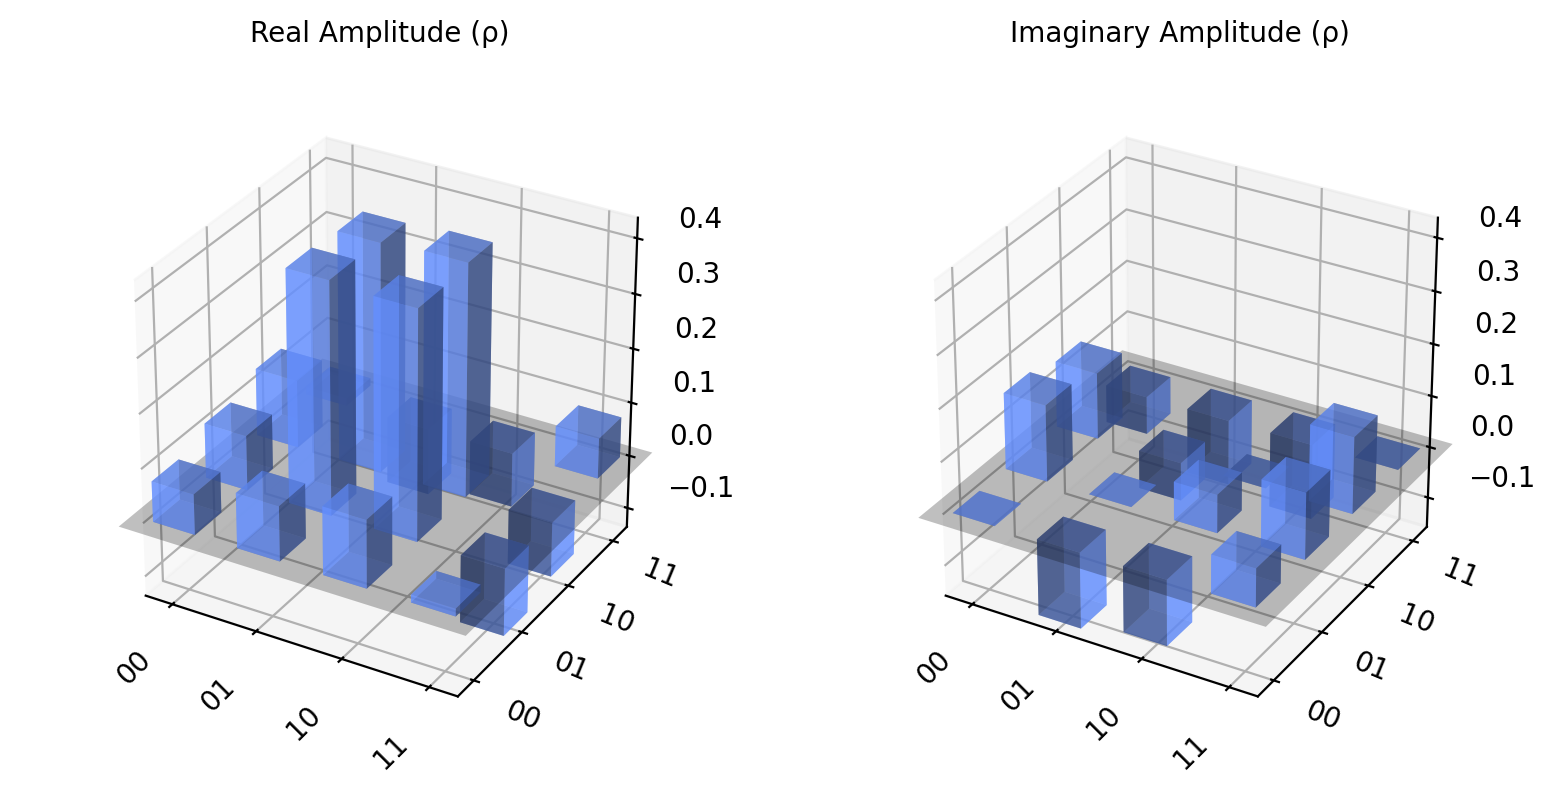

In [7]:
# You can make the bars more transparent to better see the ones that are behind
# if they overlap.
 
import numpy as np
from qiskit.visualization import plot_state_city
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
  
qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cz(0,1)
qc.ry(np.pi/3, 0)
qc.rx(np.pi/5, 1)
 
state = Statevector(qc)
plot_state_city(state, alpha=0.6, figsize=(8, 4))

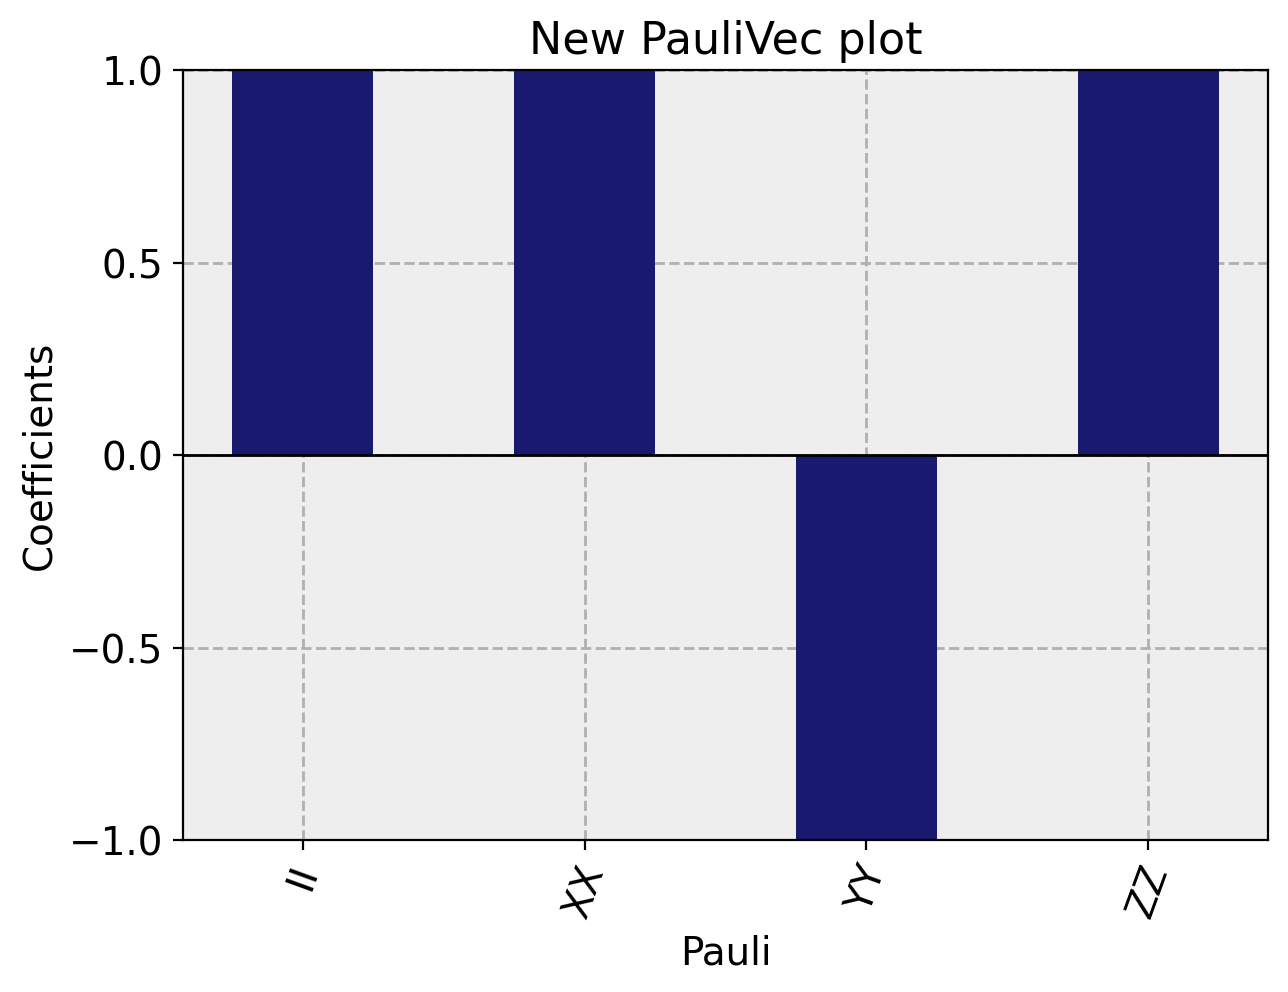

In [8]:
# https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_state_paulivec
# You can set a color for all the bars.
 
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_paulivec
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
 
state = Statevector(qc)
plot_state_paulivec(state, color='midnightblue', title="New PauliVec plot")

In [9]:
## Haar random pure state
from qiskit.quantum_info import random_statevector

random_state = random_statevector(2**2)
print(random_state)
print(random_state.data)

Statevector([ 0.24778619-0.48989869j,  0.46895694-0.11311712j,
             -0.25344459-0.19602721j, -0.34544544+0.49385404j],
            dims=(2, 2))
[ 0.24778619-0.48989869j  0.46895694-0.11311712j -0.25344459-0.19602721j
 -0.34544544+0.49385404j]


In [10]:
#### 1-design

[-0.5319058 +0.00528309j  0.02158467+0.18364417j  0.00233175-0.21135401j
 -0.30351639+0.29485695j -0.24417915+0.26337673j -0.33461328-0.03912213j
  0.45313257+0.09218969j -0.05277458+0.00422832j]
{'000': 34, '001': 2, '010': 3, '011': 17, '100': 15, '101': 8, '110': 21}


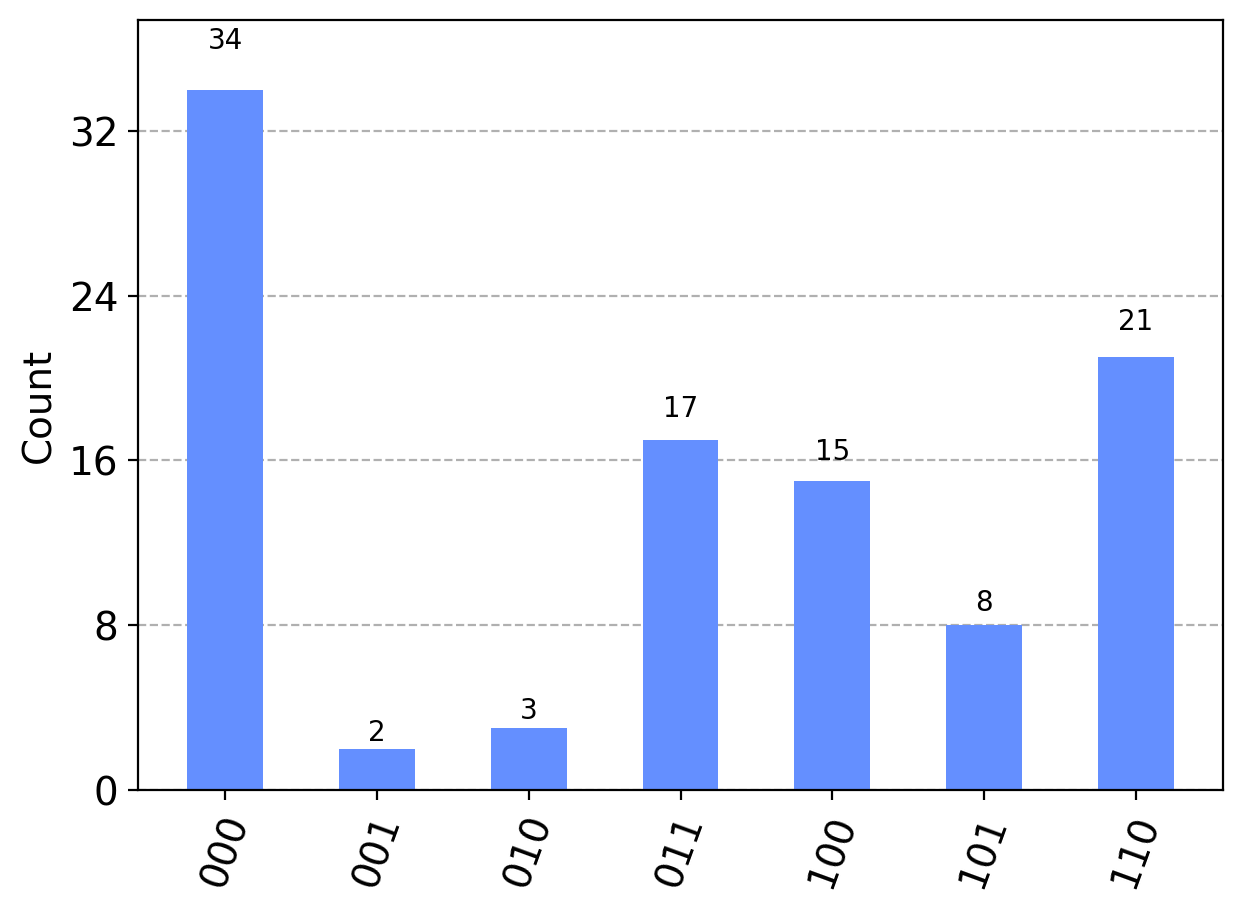

In [11]:
n = 3
random_state = random_statevector([2]*n)
print(random_state.data)
sample_count = random_state.sample_counts(100)
print(sample_count)
# plot histogram of sample count
from qiskit.visualization import plot_histogram
plot_histogram(sample_count)

In [12]:
## random densitry matrix
from qiskit.quantum_info import random_density_matrix

random_density_matrix(4)

DensityMatrix([[ 0.23971471-4.67898495e-19j, -0.19296108+3.99067789e-02j,
                -0.03724073-4.52703107e-02j,  0.03699196-8.29021942e-02j],
               [-0.19296108-3.99067789e-02j,  0.36186041+1.51881941e-18j,
                 0.05740503-2.58920252e-02j,  0.11288116+1.13062949e-01j],
               [-0.03724073+4.52703107e-02j,  0.05740503+2.58920252e-02j,
                 0.16477823-5.46562732e-19j, -0.05221929+1.00540399e-01j],
               [ 0.03699196+8.29021942e-02j,  0.11288116-1.13062949e-01j,
                -0.05221929-1.00540399e-01j,  0.23364665-5.04358186e-19j]],
              dims=(2, 2))


In [13]:
init_state = Statevector.from_label('0'*2)
init_dm = DensityMatrix(init_state).to_operator()
init_dm 

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


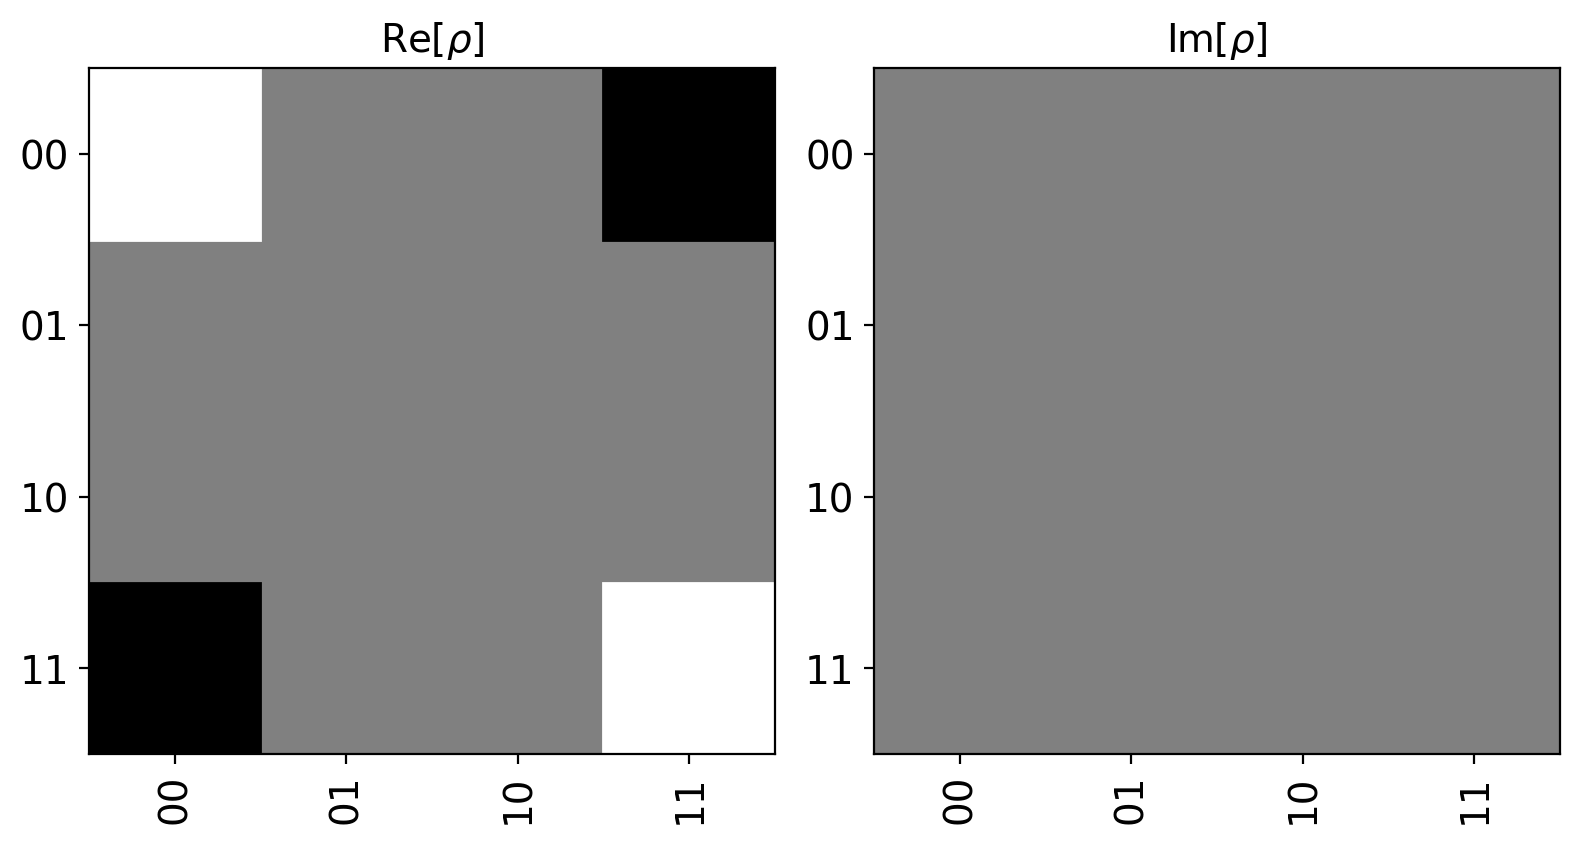

In [14]:

sv = Statevector([1/np.sqrt(2), 0, 0, -1/np.sqrt(2)])
sv.draw(output='hinton')

In [15]:
# GHZ state
ghz_state = Statevector.from_label('0000') + Statevector.from_label('1111')
# verify
print(ghz_state.is_valid())
# normalize
normalized_ghz = ghz_state/np.linalg.norm(ghz_state)
normalized_ghz.is_valid()

False


True

In [16]:
from qiskit.quantum_info import StabilizerState
 
stabilizer_list = ["ZXX", "-XYX", "+ZYY"]
stab = StabilizerState.from_stabilizer_list(stabilizer_list)
stab

StabilizerState(['+ZXX', '-XYX', '+ZYY'])

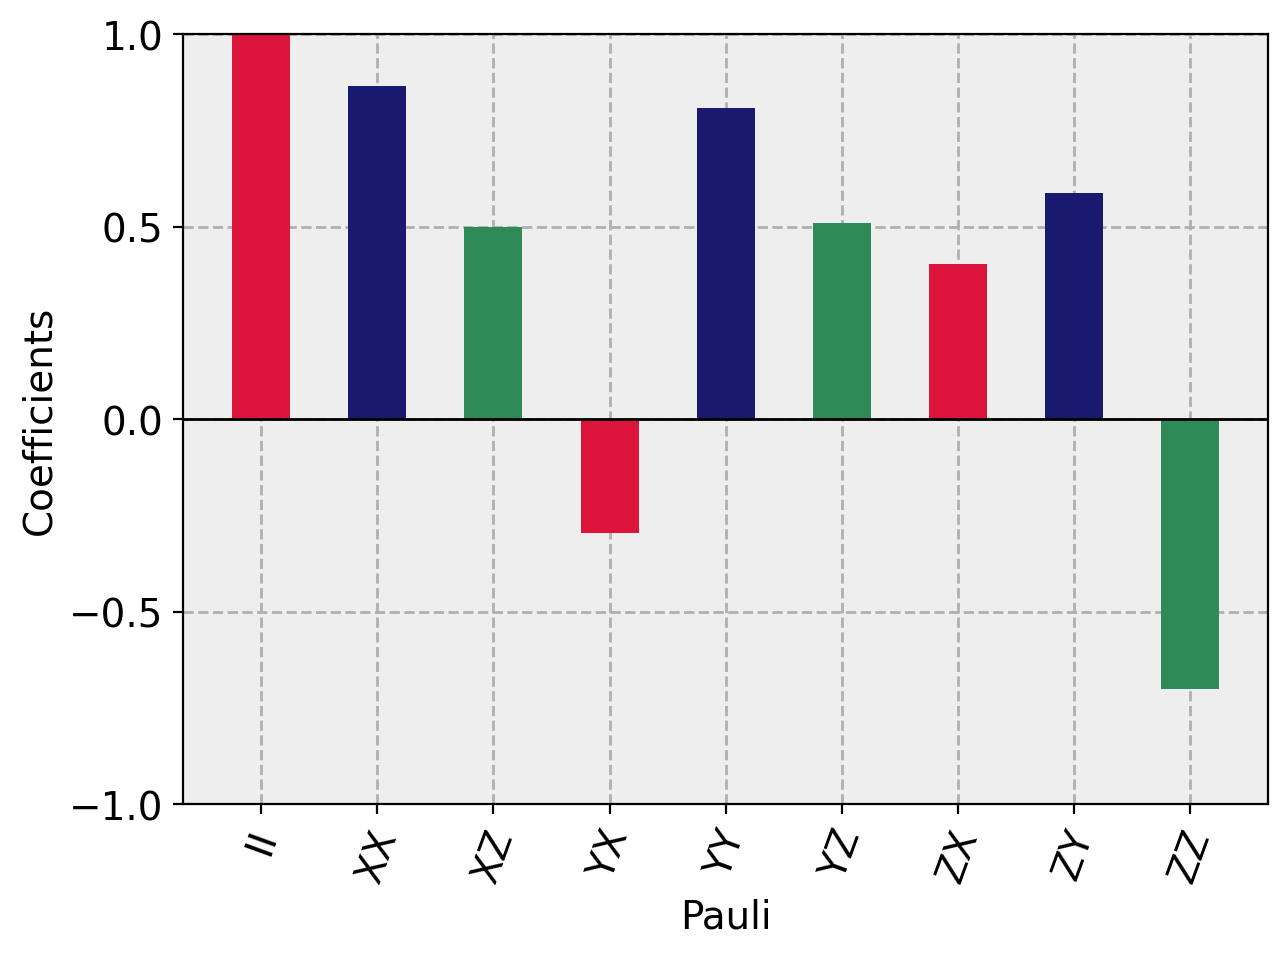

In [17]:
# If you introduce a list with less colors than bars, the color of the bars will
# alternate following the sequence from the list.
 
import numpy as np
from qiskit.quantum_info import DensityMatrix
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_paulivec
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
 
qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cz(0, 1)
qc.ry(np.pi/3, 0)
qc.rx(np.pi/5, 1)
 
matrix = DensityMatrix(qc)
plot_state_paulivec(matrix, color=['crimson', 'midnightblue', 'seagreen'])